<a href="https://colab.research.google.com/github/Seam5/BDA/blob/main/w8_%EC%8B%9C%EA%B3%84%EC%97%B4%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D(datetime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터 분석
- 모델링 진행 시 시계열 데이터는 섞어선 X -> 시계열 특성 사라짐
- pandas 제공 라이브러리 : datetime, TimeStamp, Timedelta 등
  - datetime : date(연, 월, 일) + time(시간, 분, 초, 마이크로초)
  - Timestamp : 날짜, 시간을 모두 가지고 있는 단일 객체
  - timedelta : 시계열 데이터의 덧셈, 뺄셈 가능
- 시간에 따른 경향, 추세가 보이는 데이터 -> 정상 시계열로 만들어 예측, 분석에 활용

In [ ]:
import pandas as pd
import datetime

In [ ]:
date = datetime.date(year=2023, month = 5, day =21)
time = datetime.time(hour=22, minute= 6, second =5, microsecond=1234)

In [ ]:
date

datetime.date(2023, 5, 21)

In [ ]:
time

datetime.time(22, 6, 5, 1234)

In [ ]:
dt = datetime.datetime(year=2023, month = 5, day =21,hour=22, minute= 6, second =5, microsecond=1234)

In [ ]:
dt

datetime.datetime(2023, 5, 21, 22, 6, 5, 1234)

In [ ]:
##timedelta
td = datetime.timedelta(days=20, hours=10)

In [ ]:
td

datetime.timedelta(days=20, seconds=36000)

In [ ]:
print(date+td)
print(dt+td)

2023-06-10
2023-06-11 08:06:05.001234


In [ ]:
a = pd.Series(['2023-5-21','21/5/2023','2023-6-21','2023-07-19','2023-05-32']) # 다양한 날짜 표현 방식

In [ ]:
pd.to_datetime(a,dayfirst=True,errors='coerce') 

# to_datetime() : 시계열 데이터로 변환
# dayfirst=True : 기본적인 순서(년/월/일)와 다르게 표기된 형식도 올바르게 인식하게 설정
# errors default 값 : 'raise' -> 변환 중 오류 발생 시 프로그램이 중단되고 오류 메시지가 출력
# errors='coerce' -> 변환 중 발생하는 오류를 무시하고 해당 값을 NaT (Not a Time)로 처리

0   2023-05-21
1   2023-05-21
2   2023-06-21
3   2023-07-19
4          NaT
dtype: datetime64[ns]

In [ ]:
crime= pd.read_csv('/content/crime.csv')
crime

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0.0,1.0
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1.0,0.0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1.0,0.0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1.0,0.0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...,...
102311,102311,drug-methampetamine-possess,drug-alcohol,2013-10-24 00:57:00,-105.039510,39.703935,westwood,1.0,0.0
102312,102312,traf-other,all-other-crimes,2015-04-17 19:58:00,-105.042368,39.702195,westwood,1.0,0.0
102313,102313,traffic-accident,traffic-accident,2014-01-15 13:11:00,-105.006428,39.783265,sunnyside,0.0,1.0
102314,102314,disturbing-the-peace,public-disorder,2014-06-11 00:30:00,-104.987402,39.735260,civic-center,1.0,0.0


### 데이터 타입이 시계열 데이터인지 확인

In [ ]:
crime.info()
# 문자열 데이터 -> 시계열 데이터로 변환 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61370 entries, 0 to 61369
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           61370 non-null  int64  
 1   OFFENSE_TYPE_ID      61370 non-null  object 
 2   OFFENSE_CATEGORY_ID  61370 non-null  object 
 3   REPORTED_DATE        61370 non-null  object 
 4   GEO_LON              60715 non-null  float64
 5   GEO_LAT              60714 non-null  float64
 6   NEIGHBORHOOD_ID      61369 non-null  object 
 7   IS_CRIME             61369 non-null  float64
 8   IS_TRAFFIC           61369 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102316 entries, 0 to 102315
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           102316 non-null  int64         
 1   OFFENSE_TYPE_ID      102316 non-null  object        
 2   OFFENSE_CATEGORY_ID  102316 non-null  object        
 3   REPORTED_DATE        102316 non-null  datetime64[ns]
 4   GEO_LON              101239 non-null  float64       
 5   GEO_LAT              101239 non-null  float64       
 6   NEIGHBORHOOD_ID      102316 non-null  object        
 7   IS_CRIME             102315 non-null  float64       
 8   IS_TRAFFIC           102315 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 7.0+ MB


### 시계열 데이터 컬럼을 인덱스로 지정
- 다양한 메소드 활용 가능

In [ ]:
crime_dt =crime.set_index('REPORTED_DATE')
crime_dt

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0.0,1.0
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1.0,0.0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1.0,0.0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1.0,0.0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1.0,0.0
...,...,...,...,...,...,...,...,...
2013-10-24 00:57:00,102311,drug-methampetamine-possess,drug-alcohol,-105.039510,39.703935,westwood,1.0,0.0
2015-04-17 19:58:00,102312,traf-other,all-other-crimes,-105.042368,39.702195,westwood,1.0,0.0
2014-01-15 13:11:00,102313,traffic-accident,traffic-accident,-105.006428,39.783265,sunnyside,0.0,1.0


In [ ]:
crime_dt.loc['2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2014-01-21 07:32:00,457344,traffic-accident,traffic-accident,-104.998902,39.711204,baker,0,1
2014-05-22 10:55:00,457385,harassment-dv,public-disorder,-104.905262,39.724593,hilltop,1,0
2014-01-20 17:27:00,457769,traffic-accident,traffic-accident,-104.968227,39.739752,cheesman-park,0,1


In [ ]:
crime_dt.loc['2017-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-17 02:13:00,89011,aggravated-assault,aggravated-assault,-104.99048,39.728076,lincoln-park,1.0,0.0


In [ ]:
crime_dt.loc['Dec 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-12-19 17:42:00,1219,traffic-accident,traffic-accident,-104.940355,39.781688,northeast-park-hill,0.0,1.0
2014-12-06 08:25:00,1225,disturbing-the-peace,public-disorder,-104.817529,39.773653,montbello,1.0,0.0
2014-12-19 08:29:00,1301,burglary-residence-no-force,burglary,-104.901114,39.729047,lowry-field,1.0,0.0
2014-12-01 22:13:00,1322,liquor-possession,drug-alcohol,-104.966870,39.738576,cheesman-park,1.0,0.0
2014-12-30 08:26:00,1341,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037817,39.771111,berkeley,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-17 17:59:00,102123,criminal-mischief-other,public-disorder,-104.816179,39.786232,montbello,1.0,0.0
2014-12-19 23:36:00,102172,police-false-information,all-other-crimes,-104.991308,39.744315,cbd,1.0,0.0
2014-12-11 05:11:00,102243,traffic-accident-hit-and-run,traffic-accident,-105.002489,39.747654,auraria,0.0,1.0


In [ ]:
crime_dt.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1.0,0.0
2014-01-01 01:05:00,94108,disturbing-the-peace,public-disorder,-105.032652,39.657232,harvey-park-south,1.0,0.0
2014-01-01 01:12:00,96238,traf-other,all-other-crimes,-104.987035,39.696394,platt-park,1.0,0.0
2014-01-01 01:21:00,93583,disturbing-the-peace,public-disorder,-104.889943,39.752368,stapleton,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 22:50:00,83869,theft-shoplift,larceny,-104.897950,39.769688,stapleton,1.0,0.0
2014-12-31 23:31:00,100673,drug-poss-paraphernalia,drug-alcohol,-104.986305,39.751988,five-points,1.0,0.0
2014-12-31 23:36:00,86457,traffic-accident-hit-and-run,traffic-accident,-104.988812,39.674892,overland,0.0,1.0


### 시계열 데이터 문법
- between_time : 일정 시간 사이의 데이터 추출
- at_time : 정각 데이터 추출 
- first(offset) : 전체 기간의 처음부터 일정 기간의 관측값 추출 -> 정렬 되어 있어야 함
  - offset : 기준이 될 기간 (출력할 데이터 갯수 아님 주의)
- last : 전체기간의 마지막부터 ''


In [ ]:
crime_dt14=crime_dt.loc['2014'].sort_index()

In [ ]:
crime_dt14.between_time('13:00','17:00') # Between 통해 시간 추출

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 13:08:00,1251,traffic-accident,traffic-accident,-104.912616,39.651368,hampden-south,0.0,1.0
2014-01-01 15:11:00,6387,theft-other,larceny,-104.983940,39.740330,north-capitol-hill,1.0,0.0
2014-01-01 15:25:00,78818,theft-items-from-vehicle,theft-from-motor-vehicle,-104.861679,39.658202,kennedy,1.0,0.0
2014-01-01 15:40:00,99848,traffic-accident,traffic-accident,-104.994970,39.768017,globeville,0.0,1.0
2014-01-01 16:01:00,95974,traf-other,all-other-crimes,-104.898653,39.748633,stapleton,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 13:53:00,4023,burglary-residence-no-force,burglary,-105.036122,39.676675,harvey-park,1.0,0.0
2014-12-31 14:07:00,83415,traffic-accident-hit-and-run,traffic-accident,-104.988903,39.746380,cbd,0.0,1.0
2014-12-31 15:40:00,101934,traffic-accident-hit-and-run,traffic-accident,-105.029844,39.732940,villa-park,0.0,1.0


In [ ]:
crime_dt14.at_time('16:49')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-02-28 16:49:00,79321,theft-items-from-vehicle,theft-from-motor-vehicle,-104.936901,39.759874,north-park-hill,1.0,0.0
2014-02-28 16:49:00,100708,traffic-accident-hit-and-run,traffic-accident,-104.954528,39.759661,skyland,0.0,1.0
2014-03-16 16:49:00,99180,traf-other,all-other-crimes,-104.841713,39.780590,montbello,1.0,0.0
2014-03-18 16:49:00,9578,theft-shoplift,larceny,-104.812591,39.784877,montbello,1.0,0.0
2014-03-28 16:49:00,8062,disturbing-the-peace,public-disorder,-104.976865,39.753931,five-points,1.0,0.0
2014-05-09 16:49:00,88576,drug-barbiturate-possess,drug-alcohol,-104.993418,39.743649,cbd,1.0,0.0
2014-06-17 16:49:00,90715,drug-cocaine-possess,drug-alcohol,-104.890556,39.738703,east-colfax,1.0,0.0
2014-06-18 16:49:00,98369,traffic-accident,traffic-accident,-104.987489,39.703879,baker,0.0,1.0
2014-08-21 16:49:00,77729,public-order-crimes-other,all-other-crimes,-104.989137,39.742579,cbd,1.0,0.0


In [ ]:
crime_dt14.first('5D') # 첫 번째 데이터부터 5일 간격으로 데이터를 선택

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1.0,0.0
2014-01-01 01:05:00,94108,disturbing-the-peace,public-disorder,-105.032652,39.657232,harvey-park-south,1.0,0.0
2014-01-01 01:12:00,96238,traf-other,all-other-crimes,-104.987035,39.696394,platt-park,1.0,0.0
2014-01-01 01:21:00,93583,disturbing-the-peace,public-disorder,-104.889943,39.752368,stapleton,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-01-05 13:18:00,85149,traffic-accident-hit-and-run,traffic-accident,-104.958693,39.738391,congress-park,0.0,1.0
2014-01-05 15:18:00,84606,traffic-accident,traffic-accident,-104.940553,39.682938,virginia-village,0.0,1.0
2014-01-05 15:32:00,77370,theft-shoplift,larceny,-105.009243,39.756819,highland,1.0,0.0


## resample 함수
- 시계열 데이터를 다른 주기로 재샘플링하는 메소드
  - 'W' : 주간 주기, 'M' : 월간 주기, 'Y' : 연간 주기

In [ ]:
crime_sp14=crime_dt14[['IS_CRIME','IS_TRAFFIC']]
crime_sp=crime_dt14[['IS_CRIME']]

In [ ]:
crime_spw= crime_sp.resample('W').sum()

In [ ]:
crime_sp14.resample('W').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-05,93.0,31.0
2014-01-12,198.0,81.0
2014-01-19,156.0,53.0
2014-01-26,143.0,49.0
2014-02-02,110.0,61.0
2014-02-09,109.0,53.0
2014-02-16,147.0,45.0
2014-02-23,139.0,35.0
2014-03-02,285.0,109.0


In [ ]:
crime_sp14.resample('Y').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-12-31,8469.0,3084.0


<Axes: xlabel='REPORTED_DATE'>

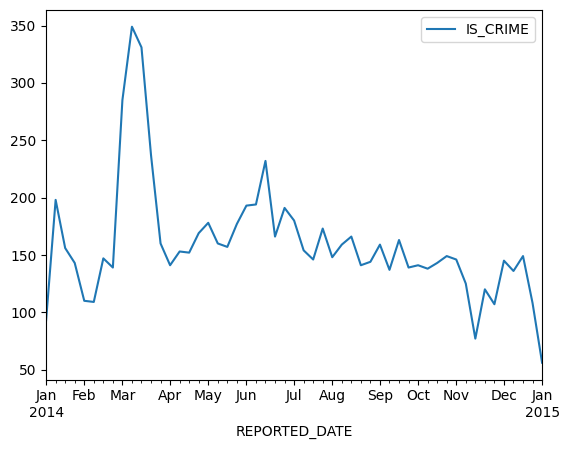

In [ ]:
crime_spw.plot()

In [ ]:
crime_dt14.resample('Q').first() # 분기 별로 그룹화한 후 각 분기의 첫번째 값 추출

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-03-31,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1.0,0.0
2014-06-30,85385,criminal-trespassing,all-other-crimes,-104.943678,39.730664,congress-park,1.0,0.0
2014-09-30,101671,disturbing-the-peace,public-disorder,-104.916252,39.672797,goldsmith,1.0,0.0
2014-12-31,100676,police-resisting-arrest,all-other-crimes,-105.029942,39.776683,berkeley,1.0,0.0


In [ ]:
crime_dt14.resample('AS-FEB').count() # 각 연도의 2월 count

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-02-01,929,929,929,923,923,929,929,929
2014-02-01,10619,10619,10619,10548,10548,10619,10619,10619


# 시계열 데이터 분석을 통한 예측

- 시계열데이터분석은 과거 데이터를 기반으로 패턴을 학습하여 미래를 예측
- 과거의 데이터의 변화가 크지 않고 정상성이 있어야 함
  - 정상성(Stationarity) : 시간에 따른 경향이 없으며, 예측 및 분석에 있어서 안정적이고 일관된 결과를 나타냄
- 정상시계열에 추가적으로 계절성 요인, 추세를 더하는 것 -> SARIMA

### SARIMA
- ARIMA = AR + MA + 차분 기본 모델
- AR/MA
  - AR 자기회귀모델 
  - MA 이동평균모델
=> 페이스북에서 제공하는 prophet 을 통해 쉽게 시계열 데이터 분석 가능

In [ ]:
# import necessary libraries
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
